<div style="background-color:rgb(230, 223, 200); color:rgb(94, 78, 27); padding: 10px; border-radius: 5px;">
    <p><strong>Segmentasi Pelanggan dengan Analisis LRFM
</strong></p>
</div>

>`AIMAR MOHAMMAD BUTRAGUENO` - `JCDS 2804`

## **Data Dictionary**

**METADATA**
<br>

| Column | Description
| -- | --- 
| Row ID | Unique ID for each row |
| Order ID | Unique Order ID for each Customer |
| Order Date | Order Date of the product |
| Ship Date | Shipping Date of the Product |
| Ship Mode | Shipping Mode specified by the Customer |
| Customer ID | Unique ID to identify each Customer |
| Customer Name | Name of the Customer |
| Segment | The segment where the Customer belongs |
| Country | Country of residence of the Customer |
| City | City of residence of of the Customer |
| State | State of residence of the Customer |
| Postal Code | Postal Code of every Customer |
| Region | Region where the Customer belong |
| Product ID | Unique ID of the Product |
| Category | Category of the product ordered |
| Sub-Category | Sub-Category of the product ordered |
| Product Name | Name of the Product |
| Sales | Sales of the Product |
| Quantity | Quantity of the Product |
| Discount | Discount provided |
| Profit | Profit/Loss incurred |

## **Exploration Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('sample_superstore.csv', encoding='latin1')
display(df_raw.head(), df_raw.tail())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [3]:
superstore = df_raw.copy()
superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
# Cek tipe data tiap kolom
tipe_data = superstore.dtypes

# Cek jumlah missing value per kolom
missing_values = superstore.isnull().sum()

# Cek jumlah data duplikat
duplikat_data = superstore.duplicated().sum()

# Tampilkan semua info dalam satu DataFrame ringkasan
data_check_summary = pd.DataFrame({
    'Data Type': tipe_data,
    'Missing Values': missing_values
})

data_check_summary['Duplicated Values (Total Rows)'] = duplikat_data
data_check_summary

,Data Type,Missing Values,Duplicated Values (Total Rows)
Row ID,int64,0,0
Order ID,object,0,0
Order Date,object,0,0
Ship Date,object,0,0
Ship Mode,object,0,0
Customer ID,object,0,0
Customer Name,object,0,0
Segment,object,0,0
Country,object,0,0
City,object,0,0


In [5]:
# Ubah kolom tanggal ke format datetime
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], format="%m/%d/%Y")
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], format="%m/%d/%Y")

# Verifikasi perubahan
superstore[['Order Date', 'Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

## **CALCULATE LRFM VALUES**

### Length & Recency

In [6]:
# Tentukan tanggal referensi = 1 hari setelah transaksi terakhir
reference_date = superstore['Order Date'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2017-12-31 00:00:00')

In [7]:
# Hitung Length dan Recency
# Length: durasi hubungan pelanggan
# Recency: hari sejak transaksi terakhir
length_recency = superstore.groupby('Customer ID').agg({
    'Order Date': [
        lambda x: (reference_date - x.max()).days,      # Recency
        lambda x: (x.max() - x.min()).days              # Length
    ]
})

# Rename kolom
length_recency.columns = ['Recency', 'Length']
length_recency


,Recency,Length
Customer ID,,
AA-10315,185,1186
AA-10375,20,1330
AA-10480,260,1077
AA-10645,56,1232
AB-10015,416,996
...,...,...
XP-21865,44,1397
YC-21895,5,1135
YS-21880,10,1074


> Apabila dilihat dari hasil tabel di atas, diketahui bahwa customer dengan CustomerID 15502 telah memiliki hubungan dengan toko selama 287 hari, yang menunjukkan bahwa pelanggan ini telah aktif melakukan pembelian dalam periode waktu yang cukup panjang. Sedangkan CustomerID 13038 hanya memiliki durasi hubungan 0 hari, artinya pelanggan ini hanya pernah melakukan satu kali transaksi.
<br>
> Dari segi recency, CustomerID 15502 terakhir melakukan pembelian 12 hari yang lalu, menunjukkan bahwa pelanggan ini masih cukup aktif dalam berbelanja. Sementara itu, CustomerID 13038 memiliki nilai recency sebesar 198 hari, yang berarti pelanggan ini sudah cukup lama tidak melakukan transaksi lagi di toko tersebut dan bisa masuk dalam kategori pelanggan pasif atau hampir churn.

### Frequency

In [8]:
# Frequency: jumlah transaksi unik (jumlah order)
frequency_superstore =superstore.groupby('Customer ID').agg({
    'Order ID': 'nunique'})
frequency_superstore.rename(columns={'Order ID': 'Frequency'}, inplace=True)
frequency_superstore

,Frequency
Customer ID,
AA-10315,5
AA-10375,9
AA-10480,4
AA-10645,6
AB-10015,3
...,...
XP-21865,11
YC-21895,5
YS-21880,8


> Apabila dilihat dari hasil tabel di atas, diketahui bahwa customer dengan CustomerID 15502 telah melakukan pembelian sebanyak 7 kali selama periode data. Hal ini menunjukkan bahwa pelanggan ini memiliki tingkat aktivitas transaksi yang cukup tinggi. Di sisi lain, CustomerID 13038 hanya melakukan 1 kali transaksi, yang mengindikasikan bahwa pelanggan tersebut belum menunjukkan pola belanja yang berulang.

### Monetary

In [9]:
monetary_superstore = superstore.groupby('Customer ID').agg({
    'Sales': 'sum'})
monetary_superstore.rename(columns={'Sales': 'Monetary'}, inplace=True)
monetary_superstore

,Monetary
Customer ID,
AA-10315,5563.560
AA-10375,1056.390
AA-10480,1790.512
AA-10645,5086.935
AB-10015,886.156
...,...
XP-21865,2374.658
YC-21895,5454.350
YS-21880,6720.444


> Dari segi total pembelanjaan (Monetary), CustomerID 15502 telah membelanjakan sebesar 4.389 satuan mata uang, yang menunjukkan kontribusi nilai tinggi terhadap penjualan toko. Sebaliknya, CustomerID 13038 hanya membelanjakan sebesar 957, yang tergolong lebih rendah dalam kontribusi pendapatan toko. Pelanggan dengan nilai monetary tinggi seperti CustomerID 15502 berpotensi menjadi pelanggan prioritas untuk dijaga loyalitasnya.

### LRFM

In [10]:
# Gabungkan semua metrik ke dalam satu dataframe
lrfm = length_recency.join([frequency_superstore, monetary_superstore]).reset_index()
lrfm

,Customer ID,Recency,Length,Frequency,Monetary
0,AA-10315,185,1186,5,5563.560
1,AA-10375,20,1330,9,1056.390
2,AA-10480,260,1077,4,1790.512
3,AA-10645,56,1232,6,5086.935
4,AB-10015,416,996,3,886.156
...,...,...,...,...,...
788,XP-21865,44,1397,11,2374.658
789,YC-21895,5,1135,5,5454.350
790,YS-21880,10,1074,8,6720.444
791,ZC-21910,55,1120,13,8025.707


Penjelasan dari masing-masing variabel di atas:

| Variable | Description |
| --- | --- |
| Customer ID | ID customer|
| Length | Usia hubungan pelanggan dengan toko, dihitung dari selisih hari antara transaksi pertama dan transaksi terakhir yang dilakukan pelanggan |
| Recency | Selisih hari terakhir bertransaksi hingga tanggal referensi analisis |
| Frequency | Jumlah transaksi yang dilakukan oleh customer |
| Monetary | Total nilai pembelanjaan yang dilakukan pelanggan |

In [11]:
# Buat fungsi binning skor (semakin bagus semakin tinggi skornya, kecuali Recency)
def score_recency(x, q):
    if x <= q[0.25]:
        return 4
    elif x <= q[0.50]:
        return 3
    elif x <= q[0.75]:
        return 2
    else:
        return 1

def score_positive(x, q):
    if x <= q[0.25]:
        return 1
    elif x <= q[0.50]:
        return 2
    elif x <= q[0.75]:
        return 3
    else:
        return 4

In [12]:
# Hitung kuartil untuk tiap metrik
quantiles = lrfm[['Recency', 'Length', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

# Terapkan skor
lrfm['R_Score'] = lrfm['Recency'].apply(score_recency, args=(quantiles['Recency'],))
lrfm['L_Score'] = lrfm['Length'].apply(score_positive, args=(quantiles['Length'],))
lrfm['F_Score'] = lrfm['Frequency'].apply(score_positive, args=(quantiles['Frequency'],))
lrfm['M_Score'] = lrfm['Monetary'].apply(score_positive, args=(quantiles['Monetary'],))

# Tambahkan kolom Total Score jika dibutuhkan
lrfm['LRFM_Score'] = lrfm[['R_Score', 'L_Score', 'F_Score', 'M_Score']].sum(axis=1)
lrfm

,Customer ID,Recency,Length,Frequency,Monetary,R_Score,L_Score,F_Score,M_Score,LRFM_Score
0,AA-10315,185,1186,5,5563.560,1,3,1,4,9
1,AA-10375,20,1330,9,1056.390,4,4,4,1,13
2,AA-10480,260,1077,4,1790.512,1,2,1,2,6
3,AA-10645,56,1232,6,5086.935,3,4,2,4,13
4,AB-10015,416,996,3,886.156,1,2,1,1,5
...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,44,1397,11,2374.658,3,4,4,3,14
789,YC-21895,5,1135,5,5454.350,4,3,1,4,12
790,YS-21880,10,1074,8,6720.444,4,2,3,4,13
791,ZC-21910,55,1120,13,8025.707,3,3,4,4,14


In [13]:
# Rule-Based Segment
def rule_segment(row):
    R, F, M = row['R_Score'], row['F_Score'], row['M_Score']
    
    if R >= 3 and F >= 3 and M >= 3:
        return 'Loyal'
    elif R >= 3 and F <= 2 and M >= 3:
        return 'Potential High Value'
    elif R >= 3 and F <= 2 and M <= 2:
        return 'Potential Low Value'
    elif R <= 2 and F >= 3 and M >= 3:
        return 'At Risk High Value'
    elif R <= 2 and F >= 3 and M <= 2:
        return 'At Risk Low Value'
    elif R == 1 and F == 1:
        return 'Lost'
    elif R == 3 and F == 2 and M == 2:
        return 'Promising New'
    elif R == 2 and F == 2 and M >= 3:
        return 'Need Attention'
    elif R == 3 and M <= 2:
        return 'Value Seekers'
    else:
        return 'Others'

# Terapkan ke dataframe
lrfm['Rule_Segment'] = lrfm.apply(rule_segment, axis=1)
lrfm

,Customer ID,Recency,Length,Frequency,Monetary,R_Score,L_Score,F_Score,M_Score,LRFM_Score,Rule_Segment
0,AA-10315,185,1186,5,5563.560,1,3,1,4,9,Lost
1,AA-10375,20,1330,9,1056.390,4,4,4,1,13,Others
2,AA-10480,260,1077,4,1790.512,1,2,1,2,6,Lost
3,AA-10645,56,1232,6,5086.935,3,4,2,4,13,Potential High Value
4,AB-10015,416,996,3,886.156,1,2,1,1,5,Lost
...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,44,1397,11,2374.658,3,4,4,3,14,Loyal
789,YC-21895,5,1135,5,5454.350,4,3,1,4,12,Potential High Value
790,YS-21880,10,1074,8,6720.444,4,2,3,4,13,Loyal
791,ZC-21910,55,1120,13,8025.707,3,3,4,4,14,Loyal


In [14]:
# Hitung statistik ringkasan tiap segmen
statistik_segment = lrfm.groupby('Rule_Segment')[['Recency', 'Length', 'Frequency', 'Monetary']].mean().round(1)
count_segment = lrfm['Rule_Segment'].value_counts().rename_axis('Rule_Segment').reset_index(name='Customer Count')
summary_segment = pd.merge(count_segment, statistik_segment, on='Rule_Segment')
summary_segment

,Rule_Segment,Customer Count,Recency,Length,Frequency,Monetary
0,Loyal,168,32.7,1185.6,8.9,4572.6
1,Others,152,135.5,962.4,5.6,1898.9
2,Lost,134,452.6,680.5,3.7,1736.6
3,Potential Low Value,111,35.3,1000.4,4.3,1062.7
4,At Risk High Value,96,164.0,1070.8,8.6,4954.5
5,Potential High Value,62,35.5,1052.7,5.2,4592.5
6,At Risk Low Value,37,167.2,1072.1,8.2,1379.5
7,Value Seekers,23,47.9,1153.5,7.9,1544.9
8,Need Attention,10,133.5,1077.1,6.0,4275.8


iny

C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_1232\3481739096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_segment, x='Rule_Segment', y='Customer Count', palette='tab20')


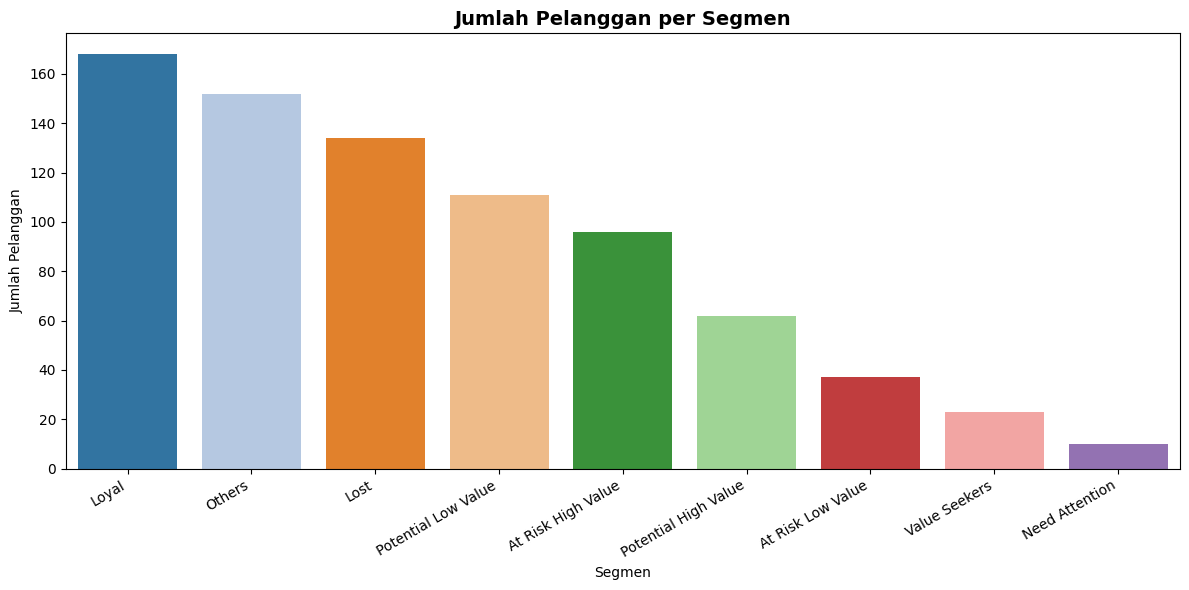

In [15]:
# Visualisasi: Jumlah pelanggan per segmen
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_segment, x='Rule_Segment', y='Customer Count', palette='tab20')
plt.title('Jumlah Pelanggan per Segmen', fontsize=14, fontweight='bold')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

#### Segmentasi Pelanggan

1. Segmen Loyal memiliki jumlah pelanggan terbanyak, menunjukkan bahwa banyak pelanggan yang:
        - Sering bertransaksi
        - Telah lama menjadi pelanggan
        - Baru-baru ini melakukan pembelian
        - Menghasilkan nilai belanja yang tinggi
- Ini adalah kelompok yang sangat bernilai bagi bisnis.

2. Segmen Others menempati posisi kedua. Ini bisa berisi pelanggan yang tidak termasuk ekstrem dalam metrik LRFM, atau merupakan gabungan dari kategori yang tidak dominan.

3. Segmen Lost juga tergolong besar, menandakan bahwa terdapat banyak pelanggan yang sudah lama tidak melakukan transaksi. Ini menjadi indikasi risiko kehilangan pelanggan jika tidak dilakukan upaya retensi.

4. Potential Low Value dan At Risk High Value memiliki jumlah pelanggan yang cukup banyak, menunjukkan adanya:
    - Pelanggan baru yang berpotensi (belum loyal, tapi bisa tumbuh)
    - Pelanggan bernilai tinggi yang sudah tidak aktif (harus segera ditindaklanjuti)

5. Segmen Need Attention memiliki jumlah pelanggan paling sedikit, artinya hanya sedikit pelanggan yang masuk kategori ini. Biasanya ini menunjukkan:
    - Pelanggan baru yang belum menunjukkan perilaku belanja yang signifikan
    - Atau pelanggan dengan pola yang tidak jelas

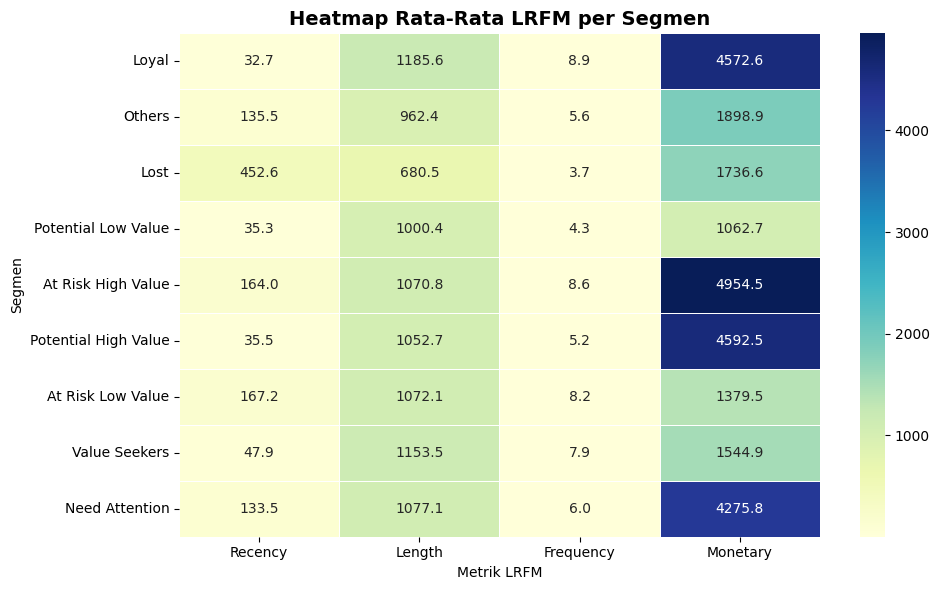

In [16]:
# Buat heatmap rata-rata LRFM per segmen
plt.figure(figsize=(10, 6))
sns.heatmap(summary_segment.set_index('Rule_Segment')[['Recency', 'Length', 'Frequency', 'Monetary']],
            annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap Rata-Rata LRFM per Segmen', fontsize=14, fontweight='bold')
plt.xlabel('Metrik LRFM')
plt.ylabel('Segmen')
plt.tight_layout()
plt.show()

Heatmap ini menunjukkan rata-rata nilai dari empat metrik LRFM (Recency, Length, Frequency, Monetary) untuk masing-masing segmen pelanggan. Warna yang lebih gelap menunjukkan nilai monetary yang lebih tinggi.

**Insight:**
1. Loyal
    - Recency sangat rendah (32.7) → pelanggan aktif
    - Frequency tinggi (8.9), Monetary tinggi (4572.6)
- Segmen terbaik, pelanggan aktif dan berkontribusi besar

2. Others
    - Rata-rata sedang untuk semua metrik
- Pelanggan dengan karakteristik campuran, perlu analisis lanjutan

3. Lost
    - Recency sangat tinggi (452.6) → sudah lama tidak berbelanja
Frequency dan Monetary rendah
- Pelanggan hilang, perlu strategi reaktivasi atau bisa diabaikan

4. Potential Low Value
    - Recency rendah (35.3) → masih baru aktif
Frequency rendah, Monetary juga rendah
- Pelanggan baru yang berpotensi tumbuh, perlu nurturing

5. At Risk High Value
    - Recency cukup tinggi (164.0), Monetary sangat tinggi (4954.5)
- Pelanggan bernilai tinggi namun sudah jarang belanja → butuh perhatian khusus

6. Potential High Value
    - Recency rendah (35.5), Monetary tinggi (4592.5)
- Pelanggan baru yang potensial menjadi VIP, harus dipertahankan

7. At Risk Low Value
    - Recency tinggi (167.2), Frequency sedang
- Pelanggan yang mungkin akan churn tapi bernilai rendah

8. Value Seekers
    - Recency dan Length rendah, Frequency lumayan (7.9)
- Pelanggan yang cenderung respon pada promosi/diskon

9. Need Attention
    - Recency sedang, Monetary tinggi (4275.8)
- Pelanggan yang pernah bernilai, tapi aktivitasnya tidak konsisten

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [19]:
# Clustering K-Means
features = lrfm[['Recency', 'Length', 'Frequency', 'Monetary']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Terapkan K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
lrfm['Cluster'] = kmeans.fit_predict(features_scaled)
lrfm

,Customer ID,Recency,Length,Frequency,Monetary,R_Score,L_Score,F_Score,M_Score,LRFM_Score,Rule_Segment,Cluster
0,AA-10315,185,1186,5,5563.560,1,3,1,4,9,Lost,2
1,AA-10375,20,1330,9,1056.390,4,4,4,1,13,Others,0
2,AA-10480,260,1077,4,1790.512,1,2,1,2,6,Lost,2
3,AA-10645,56,1232,6,5086.935,3,4,2,4,13,Potential High Value,0
4,AB-10015,416,996,3,886.156,1,2,1,1,5,Lost,1
...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,44,1397,11,2374.658,3,4,4,3,14,Loyal,0
789,YC-21895,5,1135,5,5454.350,4,3,1,4,12,Potential High Value,2
790,YS-21880,10,1074,8,6720.444,4,2,3,4,13,Loyal,3
791,ZC-21910,55,1120,13,8025.707,3,3,4,4,14,Loyal,3


In [20]:
# Hitung statistik per cluster
cluster_stats = lrfm.groupby('Cluster')[['Recency', 'Length', 'Frequency', 'Monetary']].mean().round(1)
cluster_counts = lrfm['Cluster'].value_counts().rename_axis('Cluster').reset_index(name='Customer Count')
cluster_summary = pd.merge(cluster_counts, cluster_stats, on='Cluster')

C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_1232\3469555466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Customer Count', palette='pastel')


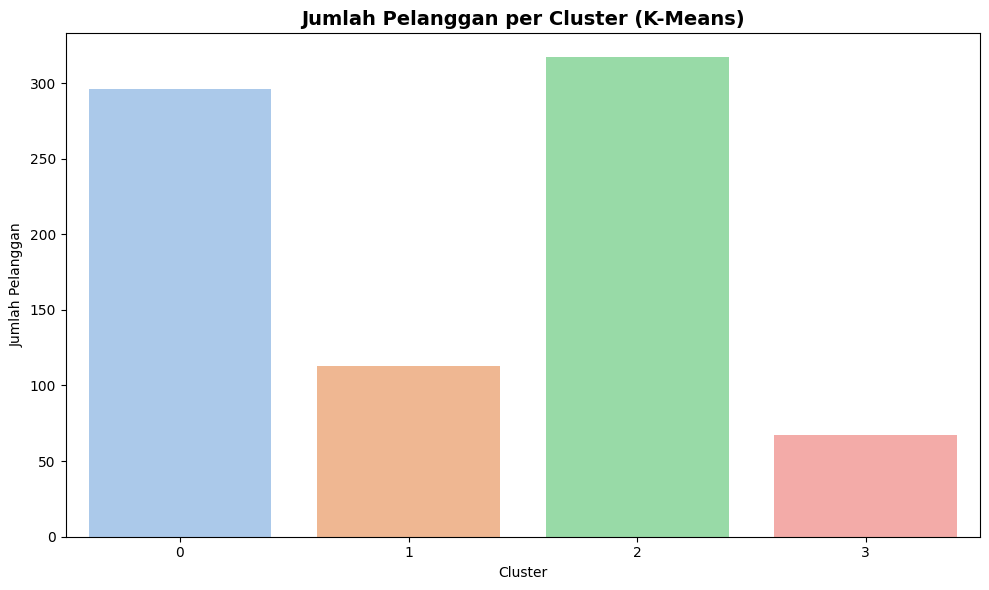

In [21]:
# Visualisasi: Distribusi jumlah pelanggan per cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='Cluster', y='Customer Count', palette='pastel')
plt.title('Jumlah Pelanggan per Cluster (K-Means)', fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

Grafik ini menunjukkan jumlah pelanggan yang tergolong dalam masing-masing cluster hasil segmentasi menggunakan algoritma K-Means Clustering. Setiap batang mewakili 1 cluster, yang terbentuk berdasarkan kesamaan pola perilaku (misalnya dari data Length, Recency, Frequency, Monetary, atau fitur lainnya).

Insight:
1. Cluster 2
    - Memiliki jumlah pelanggan terbanyak (sekitar 320 pelanggan).
- Cluster ini adalah segmen dominan, bisa jadi pelanggan rata-rata atau paling umum.

2. Cluster 0
    - Jumlahnya juga cukup besar (sekitar 295 pelanggan).
- Cluster ini mungkin mewakili pelanggan aktif namun berbeda pola dibanding Cluster 2.

3. Cluster 1
    - Jumlah pelanggan lebih sedikit (sekitar 115 pelanggan).
- Segmen ini lebih spesifik, bisa jadi kelompok pelanggan berisiko, baru, atau kurang aktif.

4. Cluster 3
    - Jumlah pelanggan paling sedikit (sekitar 65 pelanggan).
- Cluster ini kemungkinan unik dan penting: bisa jadi VIP, churn, atau promising, tergantung karakteristik metriknya.

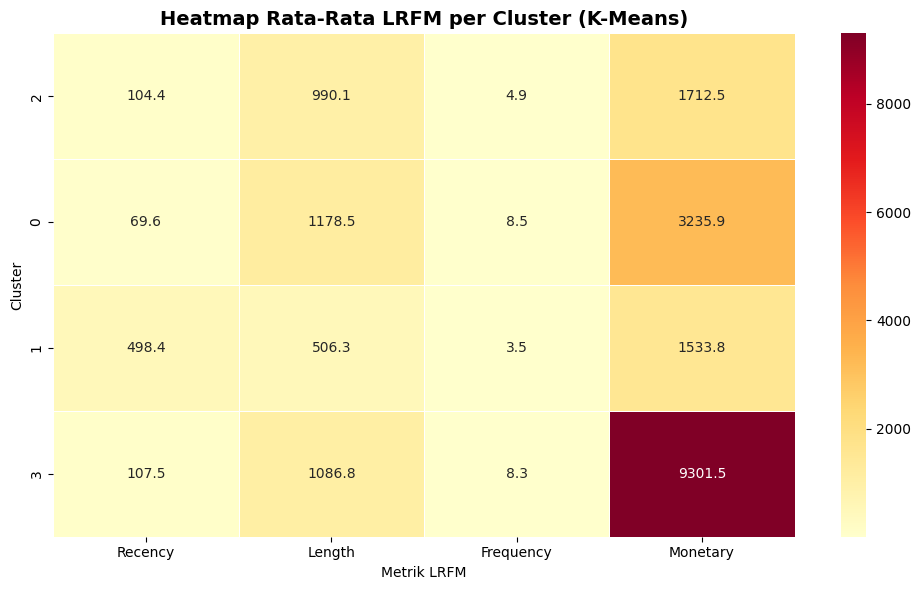

In [22]:
# Buat heatmap berdasarkan rata-rata LRFM per cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.set_index('Cluster')[['Recency', 'Length', 'Frequency', 'Monetary']],
            annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title('Heatmap Rata-Rata LRFM per Cluster (K-Means)', fontsize=14, fontweight='bold')
plt.xlabel('Metrik LRFM')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

Heatmap ini menunjukkan rata-rata nilai Recency, Length, Frequency, dan Monetary dari setiap cluster hasil segmentasi K-Means. Ini berguna untuk memahami karakteristik unik tiap cluster.

Insight:
> Cluster 0
>   - Recency: 69.6 → pelanggan relatif baru melakukan transaksi
>   - Length: 1178.5 → sudah lama jadi pelanggan
>   - Frequency: 8.5 → sering belanja
>   - Monetary: 3235.9 → kontribusi tinggi

>👉 Pelanggan loyal dan bernilai tinggi. Ideal untuk program loyalitas dan reward.
<br>

> Cluster 1
>   - Recency: 498.4 → sudah lama tidak belanja
>   - Length: 506.3 → pernah cukup lama jadi pelanggan
>   - Frequency: 3.5 → jarang belanja
>   - Monetary: 1533.8 → kontribusi rendah-sedang

>👉 Pelanggan tidak aktif, mungkin mendekati churn. Cocok untuk strategi reaktivasi.
<br>

> Cluster 2
>   - Recency: 104.4 → cukup lama sejak transaksi terakhir
>   - Length: 990.1 → pelanggan cukup lama bergabung
>   - Frequency: 4.9 → frekuensi sedang
>   - Monetary: 1712.5 → kontribusi sedang

>👉 Pelanggan biasa/umum, potensial ditingkatkan loyalitasnya melalui edukasi produk/promosi.

<br>

> Cluster 3
>   - Recency: 107.5 → baru-baru ini belanja
>   - Length: 1086.8 → sudah lama jadi pelanggan
>   - Frequency: 8.3 → sangat aktif
>   - Monetary: 9301.5 → sangat tinggi

>👉 Ini adalah top customers (VIP/high-value segment). Sangat penting untuk dijaga dan diberikan perlakuan eksklusif.


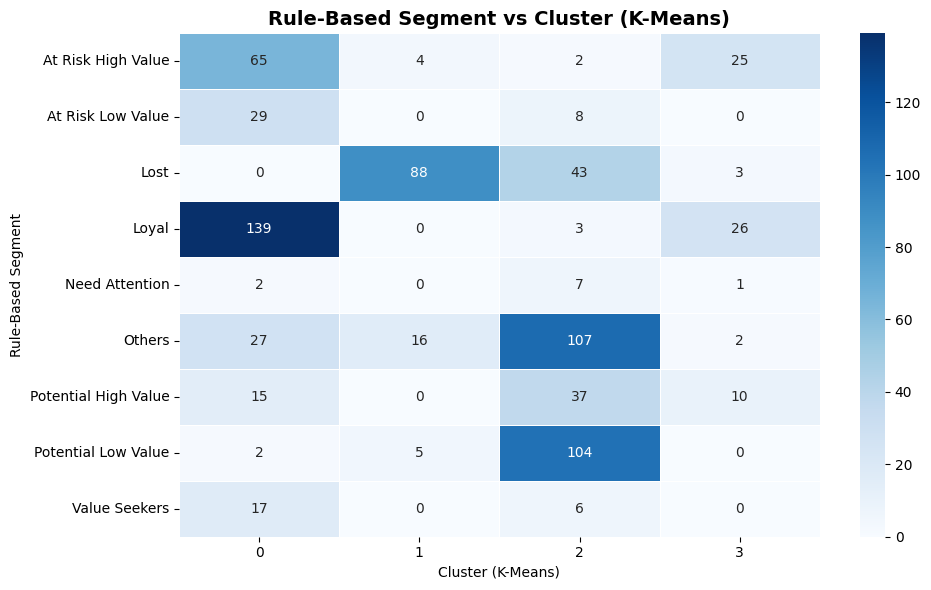

In [25]:
# Buat tabulasi silang antara Rule-Based Segment dan Cluster
cross_tab = pd.crosstab(lrfm['Rule_Segment'], lrfm['Cluster'])

# Visualisasi heatmap gabungan Rule-Based vs Cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Rule-Based Segment vs Cluster (K-Means)', fontsize=14, fontweight='bold')
plt.xlabel('Cluster (K-Means)')
plt.ylabel('Rule-Based Segment')
plt.tight_layout()
plt.show()

Heatmap di atas menunjukkan distribusi jumlah pelanggan berdasarkan:
- Segmen pelanggan (baris) yang diklasifikasikan dengan metode Rule-Based (RFM scoring)
- Cluster (kolom) yang ditentukan oleh K-Means Clustering

Ini digunakan untuk:
- Menilai konsistensi antar metode segmentasi
- Menggali karakteristik pelanggan per cluster secara lebih objektif

Insight:
1. Loyal pelanggan sangat dominan di Cluster 0 dan sebagian di Cluster 3
    - Konsisten dengan cluster yang memiliki frequency dan monetary tinggi
    > Cluster 0 & 3 = Pelanggan Aktif dan Bernilai Tinggi
<br>

2. Lost pelanggan mayoritas berada di Cluster 1, disusul Cluster 2
    - Sesuai: mereka memiliki recency tinggi dan frequency rendah
    > Cluster 1 = Pelanggan Pasif atau Churn
<br>

3. Potential Low Value terkonsentrasi di Cluster 2
    - Cluster ini menggambarkan pelanggan baru, frequency rendah, kontribusi sedang
<br>

4. At Risk High Value menyebar di Cluster 0 (65) dan Cluster 3 (25)
    - Mereka tetap terklasifikasi ke cluster dengan nilai tinggi → cocok untuk retensi
    > Cluster 3 = VIP yang berisiko




In [24]:
# Gabungkan dataset superstore dengan semua kolom di lrfm
Superstore_LRFM_Segmented = superstore.merge(lrfm[['Customer ID', 'Length', 'Recency', 'Frequency', 'Monetary', 'L_Score', 'R_Score',
                                    'F_Score', 'M_Score', 'LRFM_Score', 'Rule_Segment', 'Cluster']], on='Customer ID', how='left')
Superstore_LRFM_Segmented

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Recency,Frequency,Monetary,L_Score,R_Score,F_Score,M_Score,LRFM_Score,Rule_Segment,Cluster
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,339,3,1148.7800,1,1,1,2,5,Lost,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,339,3,1148.7800,1,1,1,2,5,Lost,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,20,5,1119.4830,1,4,1,1,7,Potential Low Value,2
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,30,6,2602.5755,1,4,2,3,10,Potential High Value,2
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,30,6,2602.5755,1,4,2,3,10,Potential High Value,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,203,7,9133.9900,4,1,3,4,12,At Risk High Value,3
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,17,7,4531.6460,4,4,3,4,15,Loyal,0
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,17,7,4531.6460,4,4,3,4,15,Loyal,0
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,17,7,4531.6460,4,4,3,4,15,Loyal,0


## **STRATEGIC RECOMMENDATIONS**

1. Pertahankan Pelanggan Loyal
    - Berikan program loyalitas, diskon khusus, atau akses eksklusif
    - Tawarkan referral bonus agar mereka bisa mengajak pelanggan baru
    - Kirimkan ucapan personal dan apresiasi berkala

2. Reaktivasi Pelanggan Berisiko
    - Segera tindak lanjuti segmen At Risk High Value

    - Kirim reminder atau penawaran spesial berbatas waktu

    - Gunakan retargeting via email, SMS, atau iklan digital

3. Kembangkan Pelanggan Potensial
    - Berikan edukasi produk & layanan kepada Potential High/Low Value

    - Dorong pembelian ulang melalui bundling atau program points

    - Monitor interaksi mereka dan berikan trigger otomatis untuk aktivasi

4. Evaluasi Pelanggan Lost
    - Lakukan uji coba kampanye reaktivasi massal untuk segmen Lost

    - Jika tidak respon, prioritaskan pelanggan lain yang masih aktif

    - Gunakan data ini untuk menghindari pola churn di masa depan

5. Segmentasi Gabungan untuk Akurasi Tinggi
    - Gunakan kombinasi antara Rule-Based dan K-Means untuk validasi segmen
    - Contoh: pelanggan yang diklasifikasikan Loyal di Rule-Based dan masuk Cluster 0/3 di K-Means adalah kandidat utama untuk VIP program

## **EXPORT FILE**

In [25]:
# export file to csv
Superstore_LRFM_Segmented.to_csv('Sample_Superstore_LRFM_Segmented.csv', index=False)

## **UPLOAD TO GOOGLE BIG QUERY**

In [26]:
from google.oauth2 import service_account
import pandas_gbq

superstore_dataset = pd.read_csv('Sample_Superstore_LRFM_Segmented.csv')
project_id = 'jcds-2804-022'
dataset_id = 'superstore_dataset'
key_path = r'C:\Users\Aimar Butragueno\Documents\Session 24 -  Keys ETL\jcds-2804-022-cf784b37f6c2.json'

scopes = ['https://www.googleapis.com/auth/bigquery']
credentials = service_account.Credentials.from_service_account_file(key_path, scopes=scopes)

pandas_gbq.to_gbq(superstore_dataset, 
                  f'{dataset_id}.sample_superstore', 
                  project_id=project_id, 
                  if_exists='replace', 
                  credentials=credentials
)

100%|██████████| 1/1 [00:00<00:00, 3355.44it/s]
